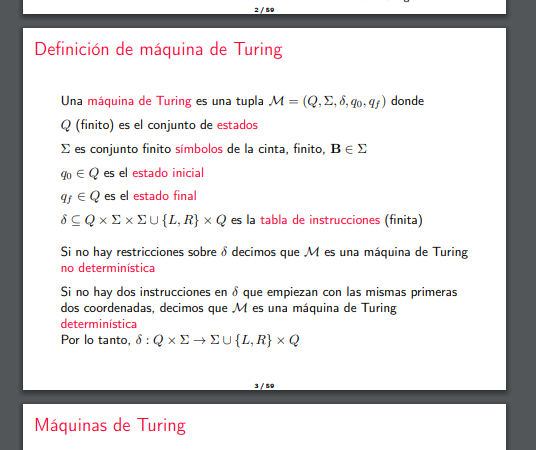

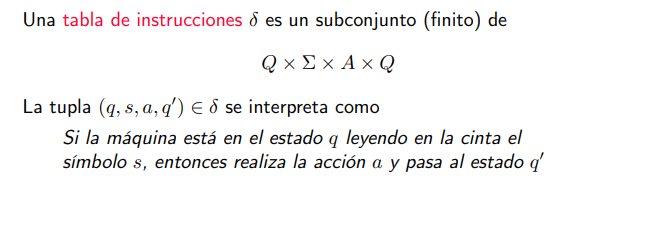

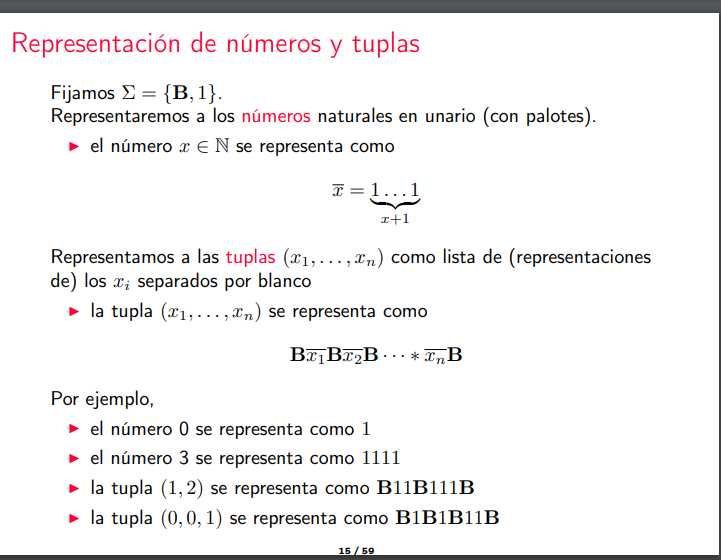

In [ ]:
from functools import partial

class unario:
    def decimal2unario(numero):
        return '1' * (numero + 1)
        
    def unario2decimal(cadena):
        return len(cadena) - 1

class tupla_unaria:
    def tupla2tupla_unaria(tupla):
        cadena = ''
        for elemento in tupla:
            cadena += 'b' + unario.decimal2unario(elemento)
        return cadena + 'b'
        
    def tupla_unaria2tupla(cadena):
        numeros = cadena.split('b')
        return tuple(map(lambda x: len(x), numeros))

class acciones_turing: # TODO: Testing unitario.
    agregado = 100

    def mover_derecha(self, maquina):
        cinta = maquina.get_cinta()
        pos_cabezal = maquina.get_pos_cabezal()
        if pos_cabezal < len(cinta): #TODO: chequear
            maquina.set_pos_cabezal(pos_cabezal + 1)
        else:
            cinta = cinta + ['b'] * self.agregado
            maquina.set_pos_cabezal(pos_cabezal + 1)
            
    def mover_izquierda(self, maquina):
        cinta = maquina.get_cinta()
        pos_cabezal = maquina.get_pos_cabezal()
        if pos_cabezal > 0: #TODO: chequear
            maquina.set_pos_cabezal(pos_cabezal - 1)  
        else:
            cinta = ['b'] * self.agregado + cinta  
            maquina.set_pos_cabezal(pos_cabezal - 1)
        
    def escribir_cinta(maquina,simbolo):
        cinta = maquina.get_cinta()
        pos_cabezal = maquina.get_pos_cabezal()
        cinta[pos_cabezal] = simbolo
        maquina.set_cinta(cinta)

class maquina_de_turing:
    estados = []
    alfabeto = []
    lista_instrucciones = {}
    estado_inicial = None
    estado_final = []
    estado_actual = None
    cinta = ['b'] * 10000
    pos_cabezal = len(cinta) // 2

    def __init__(self, estados, alfabeto, instrucciones, e_inicial, e_final):
        global b
        self.estados = estados
        self.alfabeto = alfabeto.append('b')
        self.instrucciones = instrucciones
        self.estado_inicial = e_inicial
        self.estado_final = e_final
    
    def paso(self):
        lectura_cabezal = self.leer_cabezal()
        accion, prox_estado = self.instrucciones(self.estado_actual,
                                        lectura_cabezal)
        accion(self)
        self.estado_actual = prox_estado
        
    def instrucciones(self, estado, simbolo_cabezal):
        return self.lista_instrucciones[(estado, simbolo_cabezal)]
    
    def get_cinta(self):
        return self.cinta
    
    def set_cinta(self, cinta):
        self.cinta = cinta

    def get_pos_cabezal(self):
        return self.pos_cabezal
    
    def set_pos_cabezal(self,i):
        self.pos_cabezal = i        